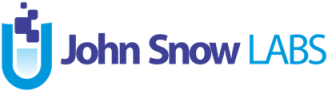

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Data_Augmenter_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest on John Snow Labs

In [ ]:
!pip install langtest==2.2.0

# DataAugmenter and its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [9]:
yaml_content = """
parameters:
    type: proportion
    style: new
tests:
    robustness:
        uppercase:
            max_proportion: 0.2
        lowercase:
            max_proportion: 0.2

"""

with open("config.yaml", "w") as f:
    f.write(yaml_content)

In [10]:
from langtest.augmentation import DataAugmenter
from langtest.tasks.task import TaskManager

data_augmenter = DataAugmenter(
    task=TaskManager("ner"),
    config="config.yaml",
)

The instance of the `DataAugmenter` class from the `langtest.augmentation` module is to perform the Data augmentation for different tasks from langtest. 
In this specific instance, the `DataAugmenter` object is created with the following parameters:

<br/>

| Parameter     | Description |
| - | - |
| **task**      | Task for which the model is to be evaluated (text-classification or ner) |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

By creating an instance of the `DataAugmenter` class, you can utilize its methods and functionalities to perform data augmentation on different tasks from langtest specific to the Named Entity Recognition task. The `config.yaml` file contains the specific configuration settings for the tests to be performed, such as the type of augmentation and the maximum proportion of augmentation for different test cases.

Overall, the `data_augmenter` object represents an instance of the `DataAugmenter` class that can be used to conduct Data augmentation for the Named Entity Recognition task based on the provided configuration.

<br/>
<br/>

#### Load Train and Test CoNLL

In [ ]:
# Load test CoNLL
!wget https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll

# Load train CoNLL
!wget https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/demo/data/conll03.conll

--2023-08-18 07:27:31--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/langtest/data/conll/sample.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50519 (49K) [text/plain]
Saving to: ‘sample.conll’

sample.conll        100%[===================>]  49.33K  --.-KB/s    in 0.006s  

2023-08-18 07:27:31 (7.50 MB/s) - ‘sample.conll’ saved [50519/50519]

--2023-08-18 07:27:31--  https://raw.githubusercontent.com/JohnSnowLabs/langtest/main/demo/data/conll03.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 827443 (

### Augmenting with train data

In [ ]:
data_augmenter.augment(data={
    'data_source': 'conll03.conll'
})

### Save the augmentated dataset 

In [ ]:
data_augmenter.save("augmented.conll")

Essentially it applies perturbations to the input data based on the recommendations from the harness reports. Then this augmented_dataset is used to retrain the original model so as to make the model more robust and improve its performance.